In [1]:
# CONFIGURATION #

dataSetFile = 'sample_hamsci_psws_data_225kHz.csv'
dataSetFolder = 'data'
resultsFolder = 'results'

In [2]:
# CONSTANTS #

dataSetLinesToSkip = 19

In [3]:
# ALLANTOOLS INSTALLATION #
#https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

import sys
!{sys.executable} -m pip install allantools

In [4]:
# IMPORTS #

from pathlib import Path
import allantools
from numpy import genfromtxt

In [5]:
# CALCULATED INPUT #

dataSetPath = Path.cwd().parent / dataSetFolder / dataSetFile
resultImagePath = Path.cwd().parent / resultsFolder / (dataSetFile[:-4])

plotHeaderName = "Frequency stability for data from " + dataSetFile

In [6]:
# DATA SET LOADING #

dataSet = genfromtxt(dataSetPath, delimiter=',', usecols=(1), skip_header=dataSetLinesToSkip)

In [7]:
# ALLAN VARIANCE CALCULATION #

allanVarianceData = allantools.Dataset(dataSet, rate=1.0, data_type="freq", taus="all")
allanVarianceData.compute("mdev")

{'taus': array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.8121e+04, 2.8122e+04,
        2.8123e+04]),
 'stat': array([0.02630864, 0.02582484, 0.02754071, ..., 0.00095875, 0.00095876,
        0.00095877]),
 'stat_err': array([9.05741604e-05, 8.89101552e-05, 9.48192533e-05, ...,
        3.03184642e-04, 3.62378022e-04, 4.79385124e-04]),
 'stat_n': array([8.4370e+04, 8.4367e+04, 8.4364e+04, ..., 1.0000e+01, 7.0000e+00,
        4.0000e+00])}

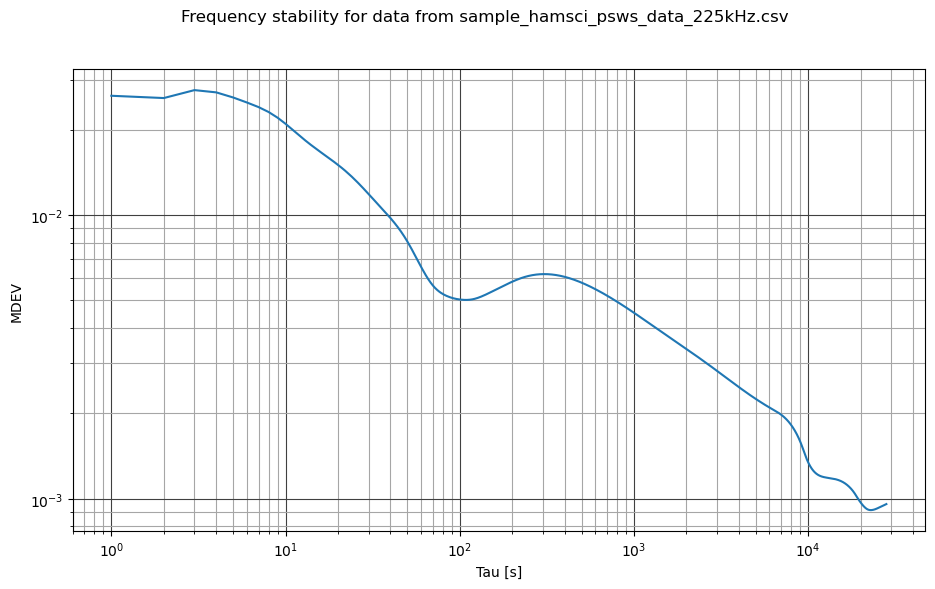

In [8]:
# DISPLAYING AND SAVING #
#https://matplotlib.org/stable/api/figure_api.html#
#https://matplotlib.org/stable/api/axes_api.html#
#https://stackoverflow.com/questions/63074673/save-images-with-plt-savefig-but-the-images-are-all-white

allanVariancePlot = allantools.Plot()

allanVariancePlot.plot(allanVarianceData, errorbars=False, grid=True)

allanVariancePlot.fig.set_size_inches(11, 6, True)
allanVariancePlot.fig.suptitle(plotHeaderName)

allanVariancePlot.ax.set_xlabel("Tau [s]")
allanVariancePlot.ax.set_ylabel("MDEV")

allanVariancePlot.save(resultImagePath)
allanVariancePlot.show()